In [2]:
import sys
sys.path.append("../")

from pathlib import Path
import matplotlib.pyplot as plt
from pyosim import Analogs3dOsim
import ipywidgets as widgets

In [2]:
# Figures
import matplotlib.pyplot as plt
import seaborn as sns

FIG_STYLE = Path('./fig_style.py')
if not FIG_STYLE.is_file():
    !wget --no-check-certificate --content-disposition https://github.com/romainmartinez/cookbook/raw/master/python/fig_style.py
from fig_style import get_style, show
plt.rcParams.update(get_style(style='mrtnz', figsize='two_col'))

In [3]:
DATA_PATH = Path("/home/romain/Downloads/results/mars/1_inverse_kinematic")

trials = [str(ifile) for ifile in DATA_PATH.glob("*.mot")]
data = [Analogs3dOsim().from_mot(itrial) for itrial in trials]
dim = [i for i in range(data[0].shape[1])]

In [11]:
d = data[0]
d.time_normalization().shape

(1, 25, 101)

In [8]:
@widgets.interact(
    d=widgets.SelectMultiple(options=dim, value=dim, description="Dimensions")
)
def update(d=dim):
    for i in range(len(data)):
        plt.plot(data[i][0, d, :].T)
    show()

interactive(children=(SelectMultiple(description='Dimensions', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…

---

In [4]:
import sys
sys.path.append("../")

from pathlib import Path
from pyosim import Analogs3dOsim
import pandas as pd
import numpy as np
import altair as alt
alt.data_transformers.enable("json")

DataTransformerRegistry.enable('json')

In [9]:
DATA_PATH = Path("/home/romain/Downloads/results/mars/1_inverse_kinematic")

data = pd.DataFrame()
for ifile in DATA_PATH.glob("*.mot"):
    d = Analogs3dOsim().from_mot(ifile).time_normalization(np.linspace(0, 100, 100))

    d = pd.DataFrame(d.squeeze().T, columns=d.get_2d_labels())
    d.insert(0, column="trial", value=ifile.stem)

    data = pd.concat([data, d.reset_index()])

In [24]:
melt = d.reset_index().melt(id_vars=['trial', 'index'])
melt

,trial,index,variable,value
0,wu_MarSF6H2_3,0,thorax_tilt,-25.498811
1,wu_MarSF6H2_3,1,thorax_tilt,-27.989681
2,wu_MarSF6H2_3,2,thorax_tilt,-29.853541
3,wu_MarSF6H2_3,3,thorax_tilt,-30.830501
4,wu_MarSF6H2_3,4,thorax_tilt,-31.003581
5,wu_MarSF6H2_3,5,thorax_tilt,-30.847331
6,wu_MarSF6H2_3,6,thorax_tilt,-30.318572
7,wu_MarSF6H2_3,7,thorax_tilt,-29.208990
8,wu_MarSF6H2_3,8,thorax_tilt,-27.955444
9,wu_MarSF6H2_3,9,thorax_tilt,-24.641446


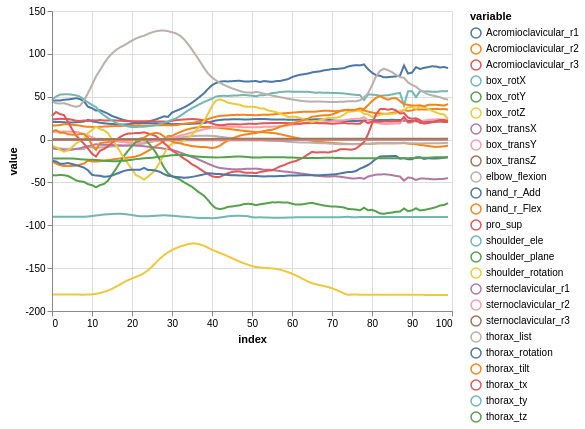

In [26]:
alt.Chart(melt).mark_line().encode(x='index', y='value', color='variable')